In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
# Lets create synthetic data points
from sklearn.datasets import make_classification

In [33]:
X,y = make_classification(n_samples=1000, n_features=2, n_classes=2,
                          n_clusters_per_class=2, n_redundant=0)

In [34]:
X

array([[-0.49516628, -1.21309464],
       [ 1.82609652,  1.12185033],
       [-0.88346446,  0.2722986 ],
       ...,
       [-0.94186005, -0.36757122],
       [ 2.35878796, -0.45970781],
       [-1.56379207,  1.47929032]])

In [35]:
y

array([0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,

In [36]:
pd.DataFrame(X)[0]

0     -0.495166
1      1.826097
2     -0.883464
3     -1.626102
4     -1.809197
         ...   
995   -1.497012
996    0.317711
997   -0.941860
998    2.358788
999   -1.563792
Name: 0, Length: 1000, dtype: float64

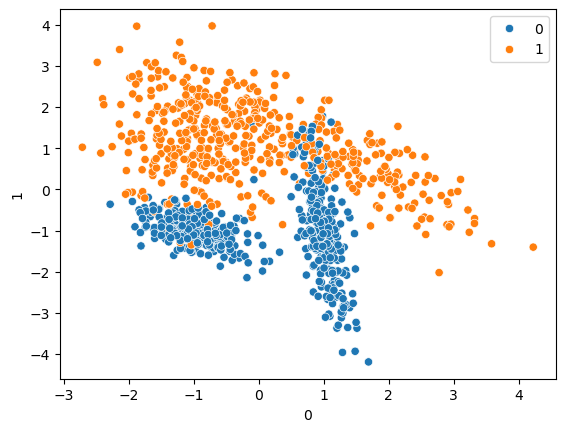

In [37]:
sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1], hue=y)
plt.show()

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=10)

In [39]:
from sklearn.svm import SVC

In [49]:
# Linear Kernel
svc = SVC(kernel='linear')

In [50]:
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [81]:
print(svc.intercept_)
print(svc.coef_)

[0.0728074]
[[0.1804245  1.44555928]]


In [51]:
# Prediction
y_pred = svc.predict(X_test)

In [52]:
from sklearn.metrics import classification_report, confusion_matrix

In [53]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.93      0.90       106
           1       0.95      0.89      0.92       144

    accuracy                           0.91       250
   macro avg       0.90      0.91      0.91       250
weighted avg       0.91      0.91      0.91       250

[[ 99   7]
 [ 16 128]]


In [54]:
# RBF Kernel
rbf = SVC(kernel='rbf')

In [55]:
rbf.fit(X_train, y_train)

SVC()

In [56]:
y_pred_rbf = rbf.predict(X_test)

In [57]:
print(classification_report(y_test, y_pred_rbf))
print(confusion_matrix(y_test, y_pred_rbf))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       106
           1       0.96      0.95      0.96       144

    accuracy                           0.95       250
   macro avg       0.95      0.95      0.95       250
weighted avg       0.95      0.95      0.95       250

[[101   5]
 [  7 137]]


In [59]:
# Polynomial Kernel
poly = SVC(kernel='poly')
poly.fit(X_train, y_train)
y_pred_poly = poly.predict(X_test)
print(classification_report(y_test, y_pred_poly))
print(confusion_matrix(y_test, y_pred_poly))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88       106
           1       0.95      0.86      0.91       144

    accuracy                           0.90       250
   macro avg       0.89      0.90      0.90       250
weighted avg       0.90      0.90      0.90       250

[[100   6]
 [ 20 124]]


In [62]:
# Sigmoid Kernel
sig = SVC(kernel='sigmoid')
sig.fit(X_train, y_train)
y_pred_sig = sig.predict(X_test)
print(classification_report(y_test, y_pred_sig))
print(confusion_matrix(y_test, y_pred_sig))

              precision    recall  f1-score   support

           0       0.75      0.84      0.79       106
           1       0.87      0.79      0.83       144

    accuracy                           0.81       250
   macro avg       0.81      0.82      0.81       250
weighted avg       0.82      0.81      0.81       250

[[ 89  17]
 [ 30 114]]


In [76]:
sig.intercept_

array([1.54579894])

In [63]:
# RBF Kernel is best for overlapped dataset
# Here : RBF > Linear > Polynomial > Sigmoid

# Hyperparameter Tuning with SVC

In [64]:
from sklearn.model_selection import GridSearchCV

In [66]:
param_grid = {'C' : [0.1, 1, 10, 100, 1000],
        'gamma' : [1, 0.1, 0.01, 0.001, 0.0001],
        'kernel' : ['rbf']}

In [67]:
grid = GridSearchCV(SVC(), param_grid=param_grid,refit=True,cv=5,verbose=3)

In [69]:
print(grid.fit(X_train, y_train))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.927 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.933 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.953 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.887 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.893 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.900 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.907 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.927 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.873 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.880 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.887 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

In [70]:
grid.best_params_

{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}

In [71]:
y_pred_grid = grid.predict(X_test)
print(classification_report(y_test, y_pred_grid))
print(confusion_matrix(y_test, y_pred_grid))

              precision    recall  f1-score   support

           0       0.90      0.95      0.93       106
           1       0.96      0.92      0.94       144

    accuracy                           0.94       250
   macro avg       0.93      0.94      0.93       250
weighted avg       0.94      0.94      0.94       250

[[101   5]
 [ 11 133]]
